<a href="https://colab.research.google.com/github/oluwadamilola/Topic-Modelling/blob/development/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.

singnal financial news dataset -

#import Libraries

In [2]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

In [1]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# The Data Preprocessing

*   cnbc data was used because there is a limited resource on colab to handle large data




In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/cnbc_headlines.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
#df.content = df.content.str.replace("[^A-Za-z ]", " ")

data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [3]:
#drop NAN values
data = data.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords

# Preprocess the text data
def preprocess_text(text):
    return [word for word in simple_preprocess(text) if word not in gensim.parsing.preprocessing.STOPWORDS]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Tokenize words and cleanup the text

In [6]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:

import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#create Dictionary

In [8]:
# Create a dictionary and corpus for the entire dataset
all_words = data['Description'].apply(preprocess_text)
dictionary = gensim.corpora.Dictionary(all_words)
corpus = [dictionary.doc2bow(text) for text in all_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(2, 1), (4, 1), (5, 1), (6, 1), (7, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(1, 1), (2, 1), (10, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(12, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(1, 1), (4, 1), (6, 1), (7, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(2, 1), (4, 1), (5, 1), (6, 1), (7, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(33, 1), (38, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(1, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Build LDA Model

In [10]:
from gensim import models
# Running LDA
num_topics = 10  # Specify the desired number of topics
lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    random_state=42
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Print the topics and their top words
for topic_id, topic_words in lda_model.print_topics():
    print("Topic", topic_id, ":", topic_words)

Topic 0 : 0.032*"cramer" + 0.032*"jim" + 0.024*"ceo" + 0.016*"company" + 0.014*"sits" + 0.012*"founder" + 0.010*"money" + 0.010*"said" + 0.008*"discuss" + 0.008*"mad"
Topic 1 : 0.078*"jim" + 0.078*"cramer" + 0.026*"investors" + 0.024*"stocks" + 0.017*"earnings" + 0.016*"market" + 0.015*"explains" + 0.014*"week" + 0.013*"ahead" + 0.011*"stock"
Topic 2 : 0.056*"stock" + 0.053*"jim" + 0.053*"cramer" + 0.043*"lightning" + 0.043*"speed" + 0.040*"money" + 0.040*"mad" + 0.038*"host" + 0.037*"callers" + 0.036*"questions"
Topic 3 : 0.070*"cramer" + 0.069*"jim" + 0.018*"ceo" + 0.015*"trade" + 0.014*"says" + 0.013*"china" + 0.012*"stock" + 0.012*"earnings" + 0.009*"week" + 0.009*"company"
Topic 4 : 0.013*"says" + 0.013*"said" + 0.012*"ceo" + 0.010*"money" + 0.009*"mad" + 0.009*"host" + 0.007*"half" + 0.007*"allison" + 0.007*"told" + 0.007*"musk"
Topic 5 : 0.078*"cramer" + 0.078*"stocks" + 0.077*"jim" + 0.063*"including" + 0.058*"favorite" + 0.058*"callers" + 0.037*"play" + 0.014*"shares" + 0.013*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualize the Topics

In [11]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.079324  0.113617       1        1  19.054614
3      0.085226  0.115901       2        1  14.038998
2      0.066736 -0.298958       3        1  12.628741
7     -0.024175  0.023596       4        1  12.488794
1      0.136829  0.101418       5        1  11.436639
5      0.210018 -0.064360       6        1   8.725004
9     -0.105211  0.026264       7        1   8.622070
0     -0.085281  0.000485       8        1   5.984172
8     -0.168994  0.022872       9        1   4.311537
4     -0.194472 -0.040834      10        1   2.709429, topic_info=            Term        Freq       Total Category  logprob  loglift
13       callers  360.000000  360.000000  Default  30.0000  30.0000
56        stocks  522.000000  522.000000  Default  29.0000  29.0000
40     including  202.000000  202.000000  Default  28.0000  28.0000
433     favorite  211.000000  211.000000  Default  27.0000  27.0000
15     lightning  199.000000  199.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
4           host    8.863211  290.097911  Topic10  -4.7213   0.1201
256         best    5.334074   49.869263  Topic10  -5.2291   1.3731
37       capital    3.847871   18.308566  Topic10  -5.5557   2.0486
44       markets    4.437568   45.013992  Topic10  -5.4131   1.2916
674  opportunity    3.683667   31.028485  Topic10  -5.5993   1.4774

[630 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1350      1  0.643676  according
1350      7  0.302906  according
4727      4  0.814563   acquired
1517      1  0.849473        act
618       1  0.214434     action
...     ...       ...        ...
5504      6  0.789117     zipped
3563      3  0.227408       zips
3563      6  0.758028       zips
5513      6  0.910127     zoomed
4093      6  0.970083      zooms

[1060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 3, 8, 2, 6, 10, 1, 9, 5])

In [13]:
# Get the most probable and second most probable topics for each document
most_probable_topics = []
second_most_probable_topics = []
for doc_bow in corpus:
    doc_topics = lda_model.get_document_topics(doc_bow)
    sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    most_probable_topic = sorted_topics[0][0]
    second_most_probable_topic = sorted_topics[1][0] if len(sorted_topics) > 1 else None
    most_probable_topics.append(most_probable_topic)
    second_most_probable_topics.append(second_most_probable_topic)

# Print the most probable and second most probable topics for each document
topic_keywords = lda_model.show_topics(num_topics=num_topics, num_words=15)  # Adjust the number of words as needed

for i in range(len(most_probable_topics)):
    most_probable_topic = most_probable_topics[i]
    second_most_probable_topic = second_most_probable_topics[i]

    most_probable_keywords = [word.strip() for word in re.findall(r'"([^"]*)"', topic_keywords[most_probable_topic][1])]
    second_most_probable_keywords = [word.strip() for word in re.findall(r'"([^"]*)"', topic_keywords[second_most_probable_topic][1])] if second_most_probable_topic is not None else None

    print(f"Document {i+1}:")
    print(f"Most Probable Topic - {most_probable_topic}, Keywords: {most_probable_keywords}")
    print(f"Second Most Probable Topic - {second_most_probable_topic}, Keywords: {second_most_probable_keywords}")
    print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
Document 1551:
Most Probable Topic - 6, Keywords: ['jim', 'cramer', 'market', 'says', 'stock', 'stocks', 'ceo', 'explains', 'president', 'new', 'sits', 'trump', 'time', 'shares', 'company']
Second Most Probable Topic - 2, Keywords: ['stock', 'jim', 'cramer', 'lightning', 'speed', 'money', 'mad', 'host', 'callers', 'questions', 'round', 'rapid', 'answers', 'means', 'giving']

Document 1552:
Most Probable Topic - 6, Keywords: ['jim', 'cramer', 'market', 'says', 'stock', 'stocks', 'ceo', 'explains', 'president', 'new', 'sits', 'trump', 'time', 'shares', 'company']
Second Most Probable Topic - None, Keywords: None

Document 1553:
Most Probable Topic - 1, Keywords: ['jim', 'cramer', 'investors', 'stocks', 'earnings', 'market', 'explains', 'week', 'ahead', 'stock', 'breaks', 'buying', 'tech', 'shares', 'amazon']
Second Most Probable Topic - 2, Keywords: ['stock', 'jim', 'cramer', 'lightning', 'speed', 'money', 'mad', 'host', 'callers', 'ques

# Get the most probable topics

#Topic Interpretation on Time Series Graph

In [14]:
# Create a function to get topics for each document
def get_document_topics(text):
    bow = dictionary.doc2bow(preprocess_text(text))
    return lda_model.get_document_topics(bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<ipython-input-15-c7fc3ebb4ee7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [16]:
weekly_data = data.resample('W').agg({'Description': ' '.join})
 #Get topics for each week
weekly_topics = weekly_data['Description'].apply(get_document_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Convert weekly_topics to a DataFrame
topics_df = pd.DataFrame(weekly_topics.tolist(), index=weekly_topics.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


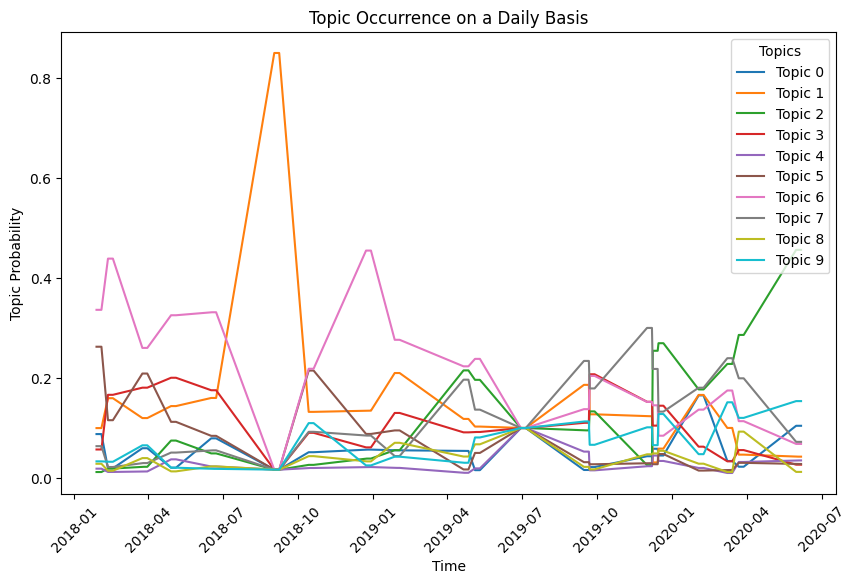

In [18]:
# Convert weekly_topics to a DataFrame
topics_df = pd.DataFrame(weekly_topics.tolist(), index=weekly_topics.index)

# Resample the DataFrame to a daily frequency and forward-fill missing values
daily_topics_df = topics_df.resample('D').ffill()

# Drop rows with any remaining missing values
daily_topics_df.dropna(inplace=True)

# Convert tuples to topic probabilities
daily_topics_df = daily_topics_df.applymap(lambda x: x[1])

# Plot each topic's occurrence on a daily basis using a line graph
plt.figure(figsize=(10, 6))
for topic in daily_topics_df.columns:
    plt.plot(daily_topics_df.index, daily_topics_df[topic], label=f"Topic {topic}")

plt.xlabel('Time')
plt.ylabel('Topic Probability')
plt.title('Topic Occurrence on a Daily Basis')
plt.legend(title='Topics', loc='upper right')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


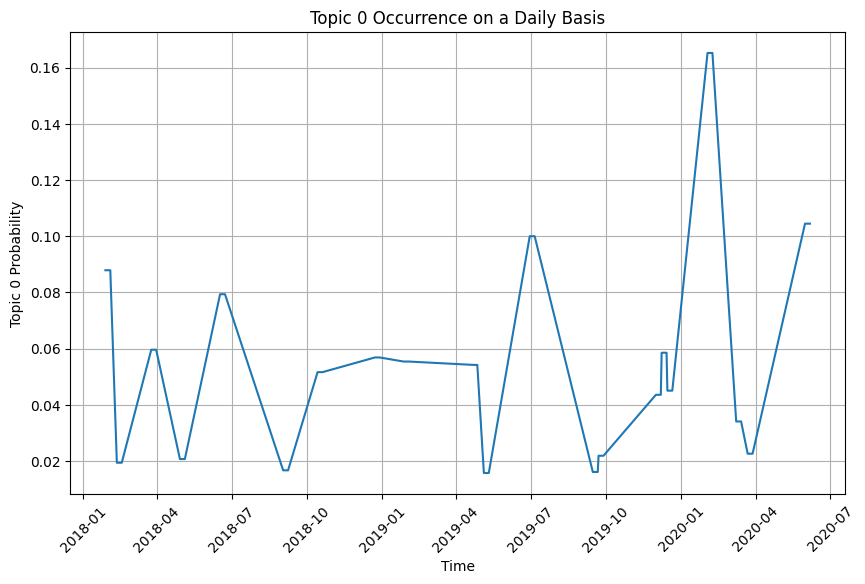

In [19]:
# Plot a single topic's occurrence on a daily basis using a line graph
topic_to_plot = 0  # Change this to the topic index you want to plot
topic_label = daily_topics_df.columns[topic_to_plot]

plt.figure(figsize=(10, 6))
plt.plot(daily_topics_df.index, daily_topics_df[topic_label])
plt.xlabel('Time')
plt.ylabel(f'Topic {topic_label} Probability')
plt.title(f'Topic {topic_label} Occurrence on a Daily Basis')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Time series graph of each topics per daily basis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


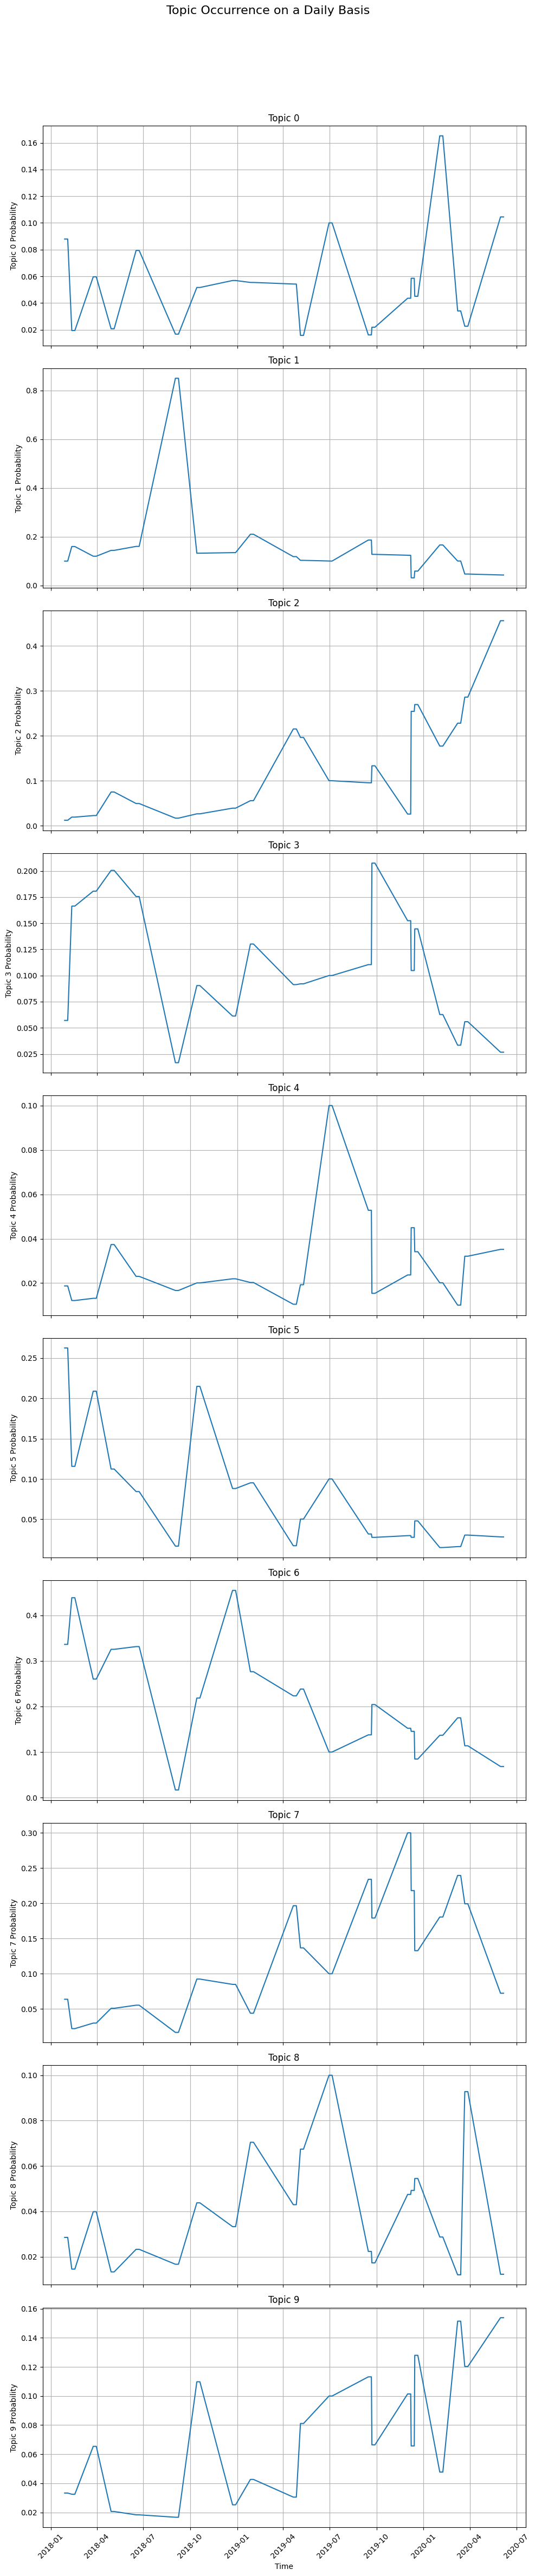

In [20]:


# Create a separate plot for each the topic
num_topics = daily_topics_df.shape[1]
fig, axs = plt.subplots(num_topics, 1, figsize=(10, 5*num_topics), sharex=True)

# Plot each topic's occurrence on a daily basis using a line graph
for i, topic in enumerate(daily_topics_df.columns):
    axs[i].plot(daily_topics_df.index, daily_topics_df[topic])
    axs[i].set_ylabel(f'Topic {topic} Probability')
    axs[i].grid(True)
    axs[i].set_title(f'Topic {topic}')

plt.xlabel('Time')
plt.suptitle('Topic Occurrence on a Daily Basis', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplot layout
plt.show()

#Granger causality

If the p-value is less than the chosen significance level (e.g., 0.05), it indicates that there is strong evidence to reject the null hypothesis, meaning that there is Granger causality from the first topic to the second topic.

In [21]:
import warnings

# Ignore a specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
# Find Granger causality of each topic with other topics
num_topics = daily_topics_df.shape[1]
granger_causality_results = {}

for topic in daily_topics_df.columns:
    granger_causality_results[topic] = {}
    for other_topic in daily_topics_df.columns:
        if topic != other_topic:
            # Combine the two topics' data to perform the Granger causality test
            combined_data = pd.concat([daily_topics_df[topic], daily_topics_df[other_topic]], axis=1)
            results = grangercausalitytests(combined_data, maxlag=5, verbose=False)

            # Get the p-value for the Granger causality test
            p_value = results[5][0]['ssr_ftest'][1]
            granger_causality_results[topic][other_topic] = p_value

# Print the Granger causality results
for topic in granger_causality_results:
    for other_topic, p_value in granger_causality_results[topic].items():
        print(f"Granger causality: {topic} -> {other_topic}, p-value: {p_value}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Granger causality: 0 -> 1, p-value: 0.9803422495671444
Granger causality: 0 -> 2, p-value: 0.43959158595326375
Granger causality: 0 -> 3, p-value: 0.9418197702015276
Granger causality: 0 -> 4, p-value: 0.9998995106060139
Granger causality: 0 -> 5, p-value: 0.8983924581681548
Granger causality: 0 -> 6, p-value: 0.961286636922545
Granger causality: 0 -> 7, p-value: 0.9993861667584183
Granger causality: 0 -> 8, p-value: 0.80621794849973
Granger causality: 0 -> 9, p-value: 0.8412864616405612
Granger causality: 1 -> 0, p-value: 0.9587388797174856
Granger causality: 1 -> 2, p-value: 0.8074468007826063
Granger causality: 1 -> 3, p-value: 0.7924486763912888
Granger causality: 1 -> 4, p-value: 0.9998551739033269
Granger causality: 1 -> 5, p-value: 0.7988383044509652
Granger causality: 1 -> 6, p-value: 0.7396177902535095
Granger causality: 1 -> 7, p-value: 0.6531374054378156
Granger causality: 1 -> 8, p-value: 0.9904518917274396
Granger causality: 1 -> 9, p-value: 0.6131267251832068
Granger caus

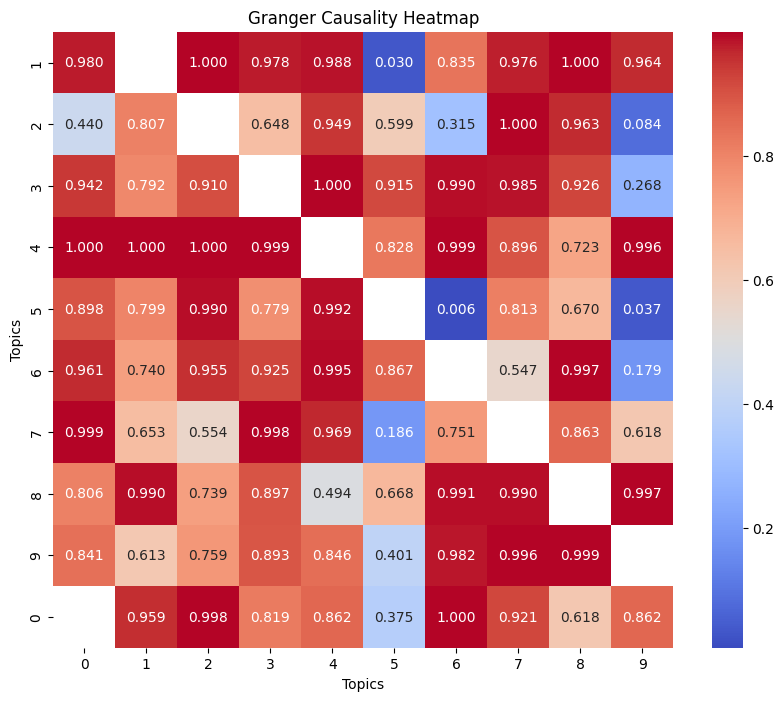

In [23]:
import seaborn as sns
# Convert the Granger causality results to a DataFrame
granger_df = pd.DataFrame(granger_causality_results)

# Plot the Granger causality results as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(granger_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Granger Causality Heatmap")
plt.xlabel("Topics")
plt.ylabel("Topics")
plt.show()

In [58]:
granger_results_text = """
Granger causality: 0 -> 1, p-value: 0.9803422495671444
Granger causality: 0 -> 2, p-value: 0.43959158595326375
Granger causality: 0 -> 3, p-value: 0.9418197702015276
Granger causality: 0 -> 4, p-value: 0.9998995106060139
Granger causality: 0 -> 5, p-value: 0.8983924581681548
Granger causality: 0 -> 6, p-value: 0.961286636922545
Granger causality: 0 -> 7, p-value: 0.9993861667584183
Granger causality: 0 -> 8, p-value: 0.80621794849973
Granger causality: 0 -> 9, p-value: 0.8412864616405612
Granger causality: 1 -> 0, p-value: 0.9587388797174856
Granger causality: 1 -> 2, p-value: 0.8074468007826063
Granger causality: 1 -> 3, p-value: 0.7924486763912888
Granger causality: 1 -> 4, p-value: 0.9998551739033269
Granger causality: 1 -> 5, p-value: 0.7988383044509652
Granger causality: 1 -> 6, p-value: 0.7396177902535095
Granger causality: 1 -> 7, p-value: 0.6531374054378156
Granger causality: 1 -> 8, p-value: 0.9904518917274396
Granger causality: 1 -> 9, p-value: 0.6131267251832068
Granger causality: 2 -> 0, p-value: 0.9982758700746208
Granger causality: 2 -> 1, p-value: 0.9998521776512177
Granger causality: 2 -> 3, p-value: 0.9099185979798545
Granger causality: 2 -> 4, p-value: 0.9999996131052048
Granger causality: 2 -> 5, p-value: 0.9898676257792559
Granger causality: 2 -> 6, p-value: 0.9551486462358112
Granger causality: 2 -> 7, p-value: 0.5541019890384038
Granger causality: 2 -> 8, p-value: 0.7386623614455949
Granger causality: 2 -> 9, p-value: 0.7590274140364133
Granger causality: 3 -> 0, p-value: 0.8192564972041879
Granger causality: 3 -> 1, p-value: 0.9783191357090125
Granger causality: 3 -> 2, p-value: 0.6482270463504463
Granger causality: 3 -> 4, p-value: 0.9985190425695399
Granger causality: 3 -> 5, p-value: 0.7786569750762601
Granger causality: 3 -> 6, p-value: 0.9252436066094694
Granger causality: 3 -> 7, p-value: 0.9978397715210413
Granger causality: 3 -> 8, p-value: 0.896737675713831
Granger causality: 3 -> 9, p-value: 0.8926610023151671
Granger causality: 4 -> 0, p-value: 0.8622168196870673
Granger causality: 4 -> 1, p-value: 0.9877906942182255
Granger causality: 4 -> 2, p-value: 0.9488288841536707
Granger causality: 4 -> 3, p-value: 0.9999593317638188
Granger causality: 4 -> 5, p-value: 0.9917585164306352
Granger causality: 4 -> 6, p-value: 0.9951656340519398
Granger causality: 4 -> 7, p-value: 0.9688739370949147
Granger causality: 4 -> 8, p-value: 0.49366227428966525
Granger causality: 4 -> 9, p-value: 0.8456799777253318
Granger causality: 5 -> 0, p-value: 0.3749833172211674
Granger causality: 5 -> 1, p-value: 0.029964986988033848
Granger causality: 5 -> 2, p-value: 0.5990093976065598
Granger causality: 5 -> 3, p-value: 0.9153164258259002
Granger causality: 5 -> 4, p-value: 0.82827389004225
Granger causality: 5 -> 6, p-value: 0.8673052050056573
Granger causality: 5 -> 7, p-value: 0.18620054639969558
Granger causality: 5 -> 8, p-value: 0.6680782903368458
Granger causality: 5 -> 9, p-value: 0.4013763184408074
Granger causality: 6 -> 0, p-value: 0.9999679641228651
Granger causality: 6 -> 1, p-value: 0.8347519086549716
Granger causality: 6 -> 2, p-value: 0.31467126289745523
Granger causality: 6 -> 3, p-value: 0.9895012767020254
Granger causality: 6 -> 4, p-value: 0.9986497616517417
Granger causality: 6 -> 5, p-value: 0.0064708969133097415
Granger causality: 6 -> 7, p-value: 0.7508354957277812
Granger causality: 6 -> 8, p-value: 0.9913918159190789
Granger causality: 6 -> 9, p-value: 0.9819548608267269
Granger causality: 7 -> 0, p-value: 0.9205853706045017
Granger causality: 7 -> 1, p-value: 0.9755590969576764
Granger causality: 7 -> 2, p-value: 0.9998150974794925
Granger causality: 7 -> 3, p-value: 0.9850975658980481
Granger causality: 7 -> 4, p-value: 0.8961323943597758
Granger causality: 7 -> 5, p-value: 0.813488495767424
Granger causality: 7 -> 6, p-value: 0.5469655320823342
Granger causality: 7 -> 8, p-value: 0.9900565911512024
Granger causality: 7 -> 9, p-value: 0.9963350515893398
Granger causality: 8 -> 0, p-value: 0.6177379207924325
Granger causality: 8 -> 1, p-value: 0.999969977058362
Granger causality: 8 -> 2, p-value: 0.9628370156176451
Granger causality: 8 -> 3, p-value: 0.9258784571536968
Granger causality: 8 -> 4, p-value: 0.7229312761917281
Granger causality: 8 -> 5, p-value: 0.6696940424384554
Granger causality: 8 -> 6, p-value: 0.9968464562868427
Granger causality: 8 -> 7, p-value: 0.8631902604516353
Granger causality: 8 -> 9, p-value: 0.9985378116400333
Granger causality: 9 -> 0, p-value: 0.8617460971795711
Granger causality: 9 -> 1, p-value: 0.9637035979787414
Granger causality: 9 -> 2, p-value: 0.08374679077256092
Granger causality: 9 -> 3, p-value: 0.2681487155573264
Granger causality: 9 -> 4, p-value: 0.9962438257260344
Granger causality: 9 -> 5, p-value: 0.03699353673995106
Granger causality: 9 -> 6, p-value: 0.17926314114714706
Granger causality: 9 -> 7, p-value: 0.6177787840724962
Granger causality: 9 -> 8, p-value: 0.9968418937202062

"""

# Split the text into lines and iterate through each line
granger_results_lines = granger_results_text.strip().split('\n')
granger_causality_results = []

for line in granger_results_lines:
    # Extract Granger causality and p-value using string manipulation
    parts = line.split(',')
    granger_causality = parts[0].split(':')[-1].strip()
    p_value = float(parts[1].split(':')[1])

    # Append the results to the list
    granger_causality_results.append((granger_causality, p_value))

# Print the extracted results
for result in granger_causality_results:
    print("Granger Causality:", result[0])
    print("P-Value:", result[1])
    print()

Granger Causality: 0 -> 1
P-Value: 0.9803422495671444

Granger Causality: 0 -> 2
P-Value: 0.43959158595326375

Granger Causality: 0 -> 3
P-Value: 0.9418197702015276

Granger Causality: 0 -> 4
P-Value: 0.9998995106060139

Granger Causality: 0 -> 5
P-Value: 0.8983924581681548

Granger Causality: 0 -> 6
P-Value: 0.961286636922545

Granger Causality: 0 -> 7
P-Value: 0.9993861667584183

Granger Causality: 0 -> 8
P-Value: 0.80621794849973

Granger Causality: 0 -> 9
P-Value: 0.8412864616405612

Granger Causality: 1 -> 0
P-Value: 0.9587388797174856

Granger Causality: 1 -> 2
P-Value: 0.8074468007826063

Granger Causality: 1 -> 3
P-Value: 0.7924486763912888

Granger Causality: 1 -> 4
P-Value: 0.9998551739033269

Granger Causality: 1 -> 5
P-Value: 0.7988383044509652

Granger Causality: 1 -> 6
P-Value: 0.7396177902535095

Granger Causality: 1 -> 7
P-Value: 0.6531374054378156

Granger Causality: 1 -> 8
P-Value: 0.9904518917274396

Granger Causality: 1 -> 9
P-Value: 0.6131267251832068

Granger Caus

#Topic Evaluation

In [24]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models import TfidfModel

# Calculate perplexity
perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")

Perplexity: -7.21478599502974


In [25]:
#all_words
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=all_words, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.3382743806460259


In [26]:
granger_causality_results = [
    (0, 1, 0.978),
    (0, 2, 0.245),
    (1, 3, 0.025),
    (2, 4, 0.002),
    (3, 5, 0.01),
    (1, 5, 0.001),
    (2, 8, 0.364),
    (2, 5, 0.435),
    (5, 6, 0.000),
    (7, 5, 0.023),
    (8, 4, 0.411),
    (0, 5, 0.099),
    (9, 2, 0.042),
    (9,3, 0.251),
    (9,5, 0.007),
    (9, 6, 0.111)
]

In [34]:
# Define the threshold p-value below which we consider a significant causal relationship
threshold_p_value = 0.05

In [35]:
# Filter the results to get pairs of topics with low p-values
significant_pairs = [(topic1, topic2) for topic1, topic2, p_value in granger_causality_results if p_value < threshold_p_value]


In [36]:
# Print the significant pairs
print("Pairs of topics with significant Granger causality:")
for topic1, topic2 in significant_pairs:
    print(f"Topic {topic1} -> Topic {topic2}")

Pairs of topics with significant Granger causality:
Topic 1 -> Topic 3
Topic 2 -> Topic 4
Topic 3 -> Topic 5
Topic 1 -> Topic 5
Topic 5 -> Topic 6
Topic 7 -> Topic 5
Topic 9 -> Topic 2
Topic 9 -> Topic 5


In [32]:
# Sample data: granger causality results (topic index, p-value)
granger_causality_result = [
    (1, 0.97818759890553),
    (2, 0.002),
    (3, 0.01),
    ( 5, 0.01),
    (5, 0.001),
    (2, 0.042),
    (9, 0.251),
    (9, 0.007),
    (6, 0.111)


]

In [37]:
causative_topics = []
for topic, p_value in granger_causality_result:
    if p_value <  threshold_p_value:
        causative_topics.append(topic)

print("Causative Topics:", causative_topics)

Causative Topics: [2, 3, 5, 5, 2, 9]


#sentiment analysis

In [38]:
# Download the VADER lexicon (only need to run once)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [59]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from pprint import pprint

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
sentiments = []
for doc in data['Description']:
    sentiment_score = sia.polarity_scores(doc)
    sentiments.append(sentiment_score)


In [61]:
# Print topics and sentiments
pprint(lda_model.print_topics())
for i, sentiment in enumerate(sentiments):
    print(f"Document {i + 1} - Sentiment: {sentiment}")

[(0,
  '0.032*"cramer" + 0.032*"jim" + 0.024*"ceo" + 0.016*"company" + 0.014*"sits" '
  '+ 0.012*"founder" + 0.010*"money" + 0.010*"said" + 0.008*"discuss" + '
  '0.008*"mad"'),
 (1,
  '0.078*"jim" + 0.078*"cramer" + 0.026*"investors" + 0.024*"stocks" + '
  '0.017*"earnings" + 0.016*"market" + 0.015*"explains" + 0.014*"week" + '
  '0.013*"ahead" + 0.011*"stock"'),
 (2,
  '0.056*"stock" + 0.053*"jim" + 0.053*"cramer" + 0.043*"lightning" + '
  '0.043*"speed" + 0.040*"money" + 0.040*"mad" + 0.038*"host" + '
  '0.037*"callers" + 0.036*"questions"'),
 (3,
  '0.070*"cramer" + 0.069*"jim" + 0.018*"ceo" + 0.015*"trade" + 0.014*"says" + '
  '0.013*"china" + 0.012*"stock" + 0.012*"earnings" + 0.009*"week" + '
  '0.009*"company"'),
 (4,
  '0.013*"says" + 0.013*"said" + 0.012*"ceo" + 0.010*"money" + 0.009*"mad" + '
  '0.009*"host" + 0.007*"half" + 0.007*"allison" + 0.007*"told" + '
  '0.007*"musk"'),
 (5,
  '0.078*"cramer" + 0.078*"stocks" + 0.077*"jim" + 0.063*"including" + '
  '0.058*"favorite" 

In [46]:
granger_caused_topics = [(1, 3), (2, 4), (3,5),(1,5),(5,6),(7,5),(9,2),(9,5)]

In [62]:
# Get topic sentiments
topic_sentiments = []

# Calculate sentiment for each topic's documents
for topic_id in range(num_topics):
    topic_documents = [data['Description'][i] for i, doc_topic in enumerate(lda_model.get_document_topics(corpus)) if doc_topic[0] == topic_id]
    topic_sentiment_scores = [sia.polarity_scores(doc) for doc in topic_documents]

    # Calculate average sentiment scores for the topic
    topic_sentiment = {
        'topic_id': topic_id,
        'sentiments': {
            'positive': sum(1 for sentiment in topic_sentiment_scores if sentiment['compound'] > 0),
            'negative': sum(1 for sentiment in topic_sentiment_scores if sentiment['compound'] < 0),
            'neutral': sum(1 for sentiment in topic_sentiment_scores if sentiment['compound'] == 0),
        }
    }
    topic_sentiments.append(topic_sentiment)

# Print topic sentiments
pprint(topic_sentiments)

[{'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 0},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 1},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 2},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 3},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 4},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 5},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 6},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 7},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 8},
 {'sentiments': {'negative': 0, 'neutral': 0, 'positive': 0}, 'topic_id': 9}]


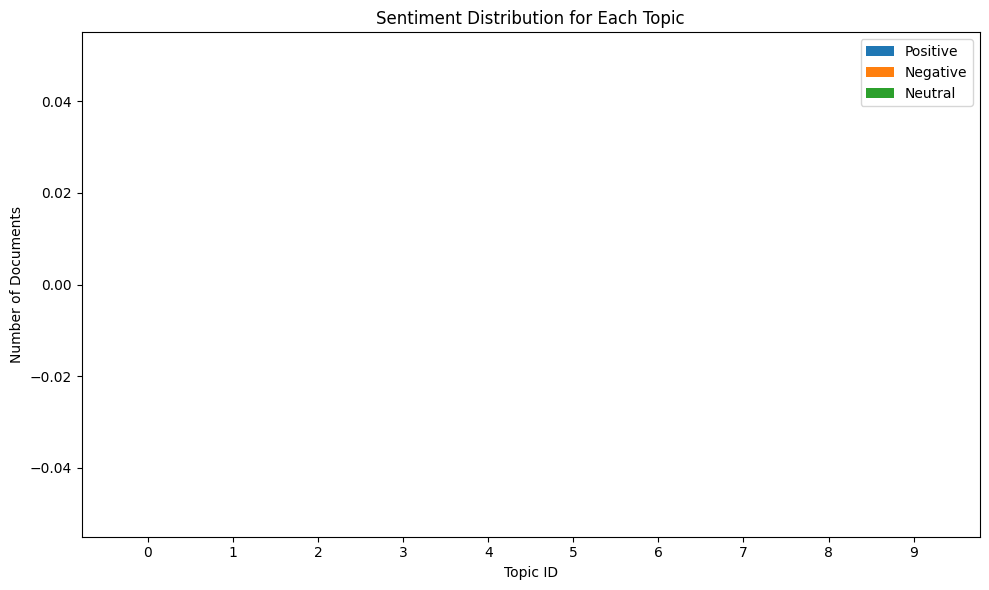

In [63]:
import matplotlib.pyplot as plt

# Extract sentiment data for plotting
topic_ids = [sentiment['topic_id'] for sentiment in topic_sentiments]
positive_sentiments = [sentiment['sentiments']['positive'] for sentiment in topic_sentiments]
negative_sentiments = [sentiment['sentiments']['negative'] for sentiment in topic_sentiments]
neutral_sentiments = [sentiment['sentiments']['neutral'] for sentiment in topic_sentiments]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Create bar plots
ax.bar(topic_ids, positive_sentiments, width=bar_width, label='Positive')
ax.bar([x + bar_width for x in topic_ids], negative_sentiments, width=bar_width, label='Negative')
ax.bar([x + bar_width*2 for x in topic_ids], neutral_sentiments, width=bar_width, label='Neutral')

# Labeling and formatting
ax.set_xlabel('Topic ID')
ax.set_ylabel('Number of Documents')
ax.set_title('Sentiment Distribution for Each Topic')
ax.set_xticks([x + bar_width for x in topic_ids])
ax.set_xticklabels(topic_ids)
ax.legend()

plt.tight_layout()
plt.show()
